In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [32]:
X, Y = datasets.make_classification(n_samples = 600, n_classes = 2, n_clusters_per_class = 1, n_features = 2, n_informative = 1, n_redundant=0, random_state = 10)

In [33]:
print(X.shape, Y.shape)
color = Y

(600, 2) (600,)


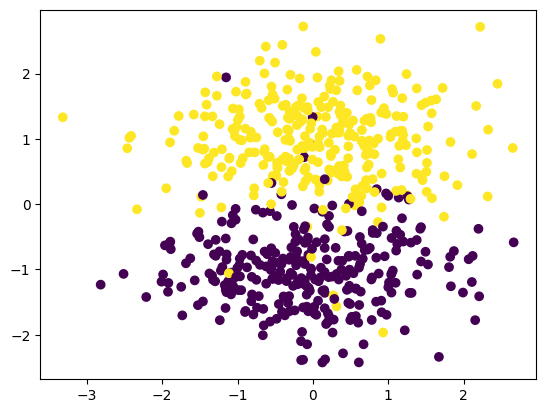

In [34]:
plt.scatter(X[:, 0], X[:, 1], c = Y)

In [35]:
Y[Y == 0] = -1

In [36]:
class SVM:
    def __init__(self, c = 0.1):
        self.c = c
        self.w = 0
        self.b = 0
        
    def hingeLoss(self, w, b, x, y):
        loss = 0
        
        loss += 0.5*(np.dot(w, w.T))
        
        for i in range(x.shape[0]):
            ti = y[i] * (np.dot(w, x[i].T) + b)
            loss += self.c * max(0, (1 - ti))
        return loss[0][0]
    
    def gradient_descent(self, x, y, epochs = 100, learning_rate = 0.003, batch = 100):
        
        w = np.zeros((1, x.shape[1]))
        b = 0
        h_loss = self.hingeLoss(w, b, x, y)
        loss = []
        loss.append(h_loss)
        
        for i in range(epochs):
            print(f'On epoch: {i}')
            loss.append(self.hingeLoss(w, b, x, y))
            
            ids = np.arange(x.shape[0])
            np.random.shuffle(ids)
            
            for batch_start in range(int(x.shape[0]/batch)):
                
                grad_w = 0
                grad_b = 0
                
                for j in range(batch_start*batch, (batch_start + 1)*batch):
                    j = ids[j]
                    try:
                        ti = y[j] * (np.dot(w, x[j].T) + b)
                        if ti >= 1:
                            grad_b+= 0
                            grad_w += 0
                        else:
                            grad_w += self.c*y[j]*x[j]
                            grad_b += self.c*y[j]
                    except:
                        pass
                            
                w = w - learning_rate * w + learning_rate*grad_w
                b = b + learning_rate*grad_b
        self.w = w
        self.b = b
        return w, b, loss

In [37]:
svm = SVM()
w, b, epoch_loss = svm.gradient_descent(X, Y, batch = 150)

On epoch: 0
On epoch: 1
On epoch: 2
On epoch: 3
On epoch: 4
On epoch: 5
On epoch: 6
On epoch: 7
On epoch: 8
On epoch: 9
On epoch: 10
On epoch: 11
On epoch: 12
On epoch: 13
On epoch: 14
On epoch: 15
On epoch: 16
On epoch: 17
On epoch: 18
On epoch: 19
On epoch: 20
On epoch: 21
On epoch: 22
On epoch: 23
On epoch: 24
On epoch: 25
On epoch: 26
On epoch: 27
On epoch: 28
On epoch: 29
On epoch: 30
On epoch: 31
On epoch: 32
On epoch: 33
On epoch: 34
On epoch: 35
On epoch: 36
On epoch: 37
On epoch: 38
On epoch: 39
On epoch: 40
On epoch: 41
On epoch: 42
On epoch: 43
On epoch: 44
On epoch: 45
On epoch: 46
On epoch: 47
On epoch: 48
On epoch: 49
On epoch: 50
On epoch: 51
On epoch: 52
On epoch: 53
On epoch: 54
On epoch: 55
On epoch: 56
On epoch: 57
On epoch: 58
On epoch: 59
On epoch: 60
On epoch: 61
On epoch: 62
On epoch: 63
On epoch: 64
On epoch: 65
On epoch: 66
On epoch: 67
On epoch: 68
On epoch: 69
On epoch: 70
On epoch: 71
On epoch: 72
On epoch: 73
On epoch: 74
On epoch: 75
On epoch: 76
On epoch:

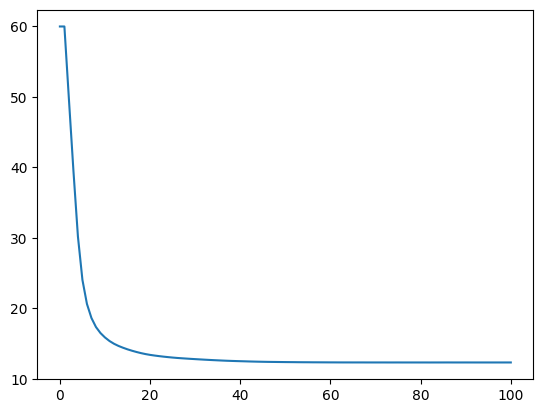

In [38]:
plt.plot(epoch_loss)

In [39]:
epoch_loss

[60.00000000000058,
 60.00000000000058,
 49.69954428100336,
 39.55360085949895,
 30.192492689472694,
 24.037364392573622,
 20.6291809714837,
 18.636065634934777,
 17.356397636006417,
 16.502206063525126,
 15.874981526680315,
 15.373267084746812,
 14.982536323684023,
 14.673536042710994,
 14.418978586972557,
 14.19127143717992,
 13.99176179709047,
 13.813134230205623,
 13.654018396837998,
 13.517606343623795,
 13.404695743820088,
 13.311831663575656,
 13.228685512450275,
 13.153561408682275,
 13.086646120030567,
 13.024985165886067,
 12.97076604890783,
 12.92558857871487,
 12.882776728054822,
 12.84072278109364,
 12.802418340288499,
 12.764989187305135,
 12.728421027084936,
 12.693632600076567,
 12.661178763002798,
 12.630523235039188,
 12.600608711545604,
 12.572874873069189,
 12.55001305774787,
 12.52888313284876,
 12.50944047447387,
 12.491319170296286,
 12.471475181990627,
 12.45461676478941,
 12.439087648782454,
 12.42613513764123,
 12.414536144377244,
 12.405768146043016,
 12.3993

In [40]:
w, b

(array([[0.01768039, 1.36535762]]), 0.06990000000000005)

In [46]:
def visualise(w1, w2, b):
    
    x = np.arange(-3, 3)
    y = -(w1*x + b)/w2
    
    l1 = -(w1*x + b + 1)/w2
    l2 = -(w1*x + b - 1)/w2
    
    plt.plot(x, y)
    plt.plot(x, l1)
    plt.plot(x, l2)
    plt.scatter(X[:, 0], X[:, 1], c = color)

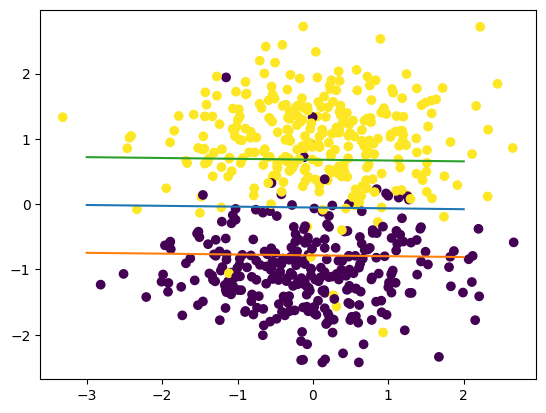

In [47]:
visualise(w[0, 0], w[0, 1], b)

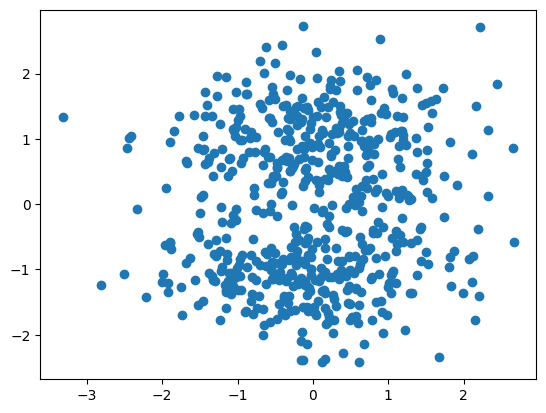

In [48]:
plt.scatter(X[:, 0], X[:, 1])